# Minimal AI Feature API Rollup Example
This notebook is intended as a bare bones example to show a straightforward case of:

* Pulling a result from the AI Feature API
* Loading the json payload into a GeoDataFrame
* Visualising the result


In [1]:
from pathlib import Path
import os
import json
import sys

import pandas as pd
import geopandas as gpd
import shapely.wkt

sys.path.append("../")
from nmaipy.feature_api import FeatureApi
from nmaipy import constants, log, parcels

# Path to local API response cache
CACHE_DIR = Path("./cache")

pd.set_option("display.max_rows", 1000)

In [2]:
# Store your Nearmap API Key in an environment variable so it doesn't appear in the notebook.
API_KEY = os.environ["API_KEY"]

In [3]:
# Create instance of feature API to use existing python library
feature_api = FeatureApi(
    api_key=API_KEY,
    cache_dir=CACHE_DIR,
    alpha=True,
    beta=True,
    prerelease=True,
    system_version="gen6-glowing_grove-1.0",
)

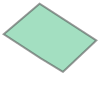

POLYGON ((-74.27669919318933 40.62759165649627, -74.27684942918067 40.62768297885442, -74.27709829841933 40.62784547600499, -74.27685577334728 40.6280515391464, -74.27647245210946 40.62780346829123, -74.27669755653214 40.62759114461118, -74.27669919318933 40.62759165649627))


In [4]:
# Load a parcel boundary from test files
polygon = parcels.read_from_file(Path("../tests/data/test_parcels_2.csv")).iloc[5].geometry
display(polygon)
print(polygon)

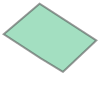

In [5]:
# Alternatively load your own boundary here
polygon = shapely.wkt.loads(
    "POLYGON ((-74.27669919318933 40.62759165649627, -74.27684942918067 40.62768297885442, -74.27709829841933 40.62784547600499, -74.27685577334728 40.6280515391464, -74.27647245210946 40.62780346829123, -74.27669755653214 40.62759114461118, -74.27669919318933 40.62759165649627))"
)
polygon

In [6]:
# Get the API payload for that polygon as a geodataframe
features_gdf, metadata_df, error_df = feature_api.get_features_gdf(
    polygon,
    until="2024-06-20",
    region="us",
)
assert error_df is None

In [7]:
metadata_df

{'system_version': 'gen6-glowing_grove-1.0',
 'link': 'https://apps.nearmap.com/maps/#/@40.6278218,-74.2767828,20.00z,0d/V/20240620',
 'date': '2024-06-20'}

<Axes: >

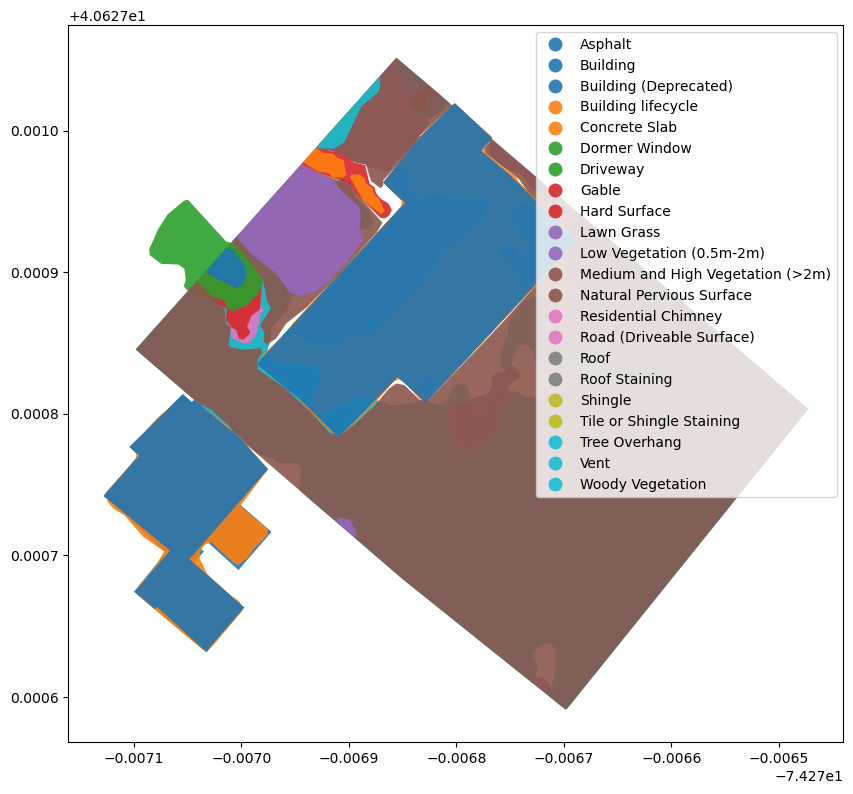

In [8]:
# Simple plot of features
features_gdf.plot("description", legend=True, figsize=(10, 10), alpha=0.9)

In [9]:
import logging

logging.root.setLevel(logging.DEBUG)
polygon = shapely.wkt.loads(
    "POLYGON ((-74.27669919318933 40.62759165649627, -74.27684942918067 40.62768297885442, -74.27709829841933 40.62784547600499, -74.27685577334728 40.6280515391464, -74.27647245210946 40.62780346829123, -74.27669755653214 40.62759114461118, -74.27669919318933 40.62759165649627))"
)
polygon

# Filter out edge features based on default logic (ratios in parcel and minimum clipped areas)
parcel_gdf = gpd.GeoDataFrame(
    {"geometry": [polygon], "aoi_id": 0},
    crs="EPSG:4326",
)
filtered_features_gdf = parcels.filter_features_in_parcels(
    features_gdf.assign(aoi_id=0), aoi_gdf=parcel_gdf, region="us"
)

<Axes: >

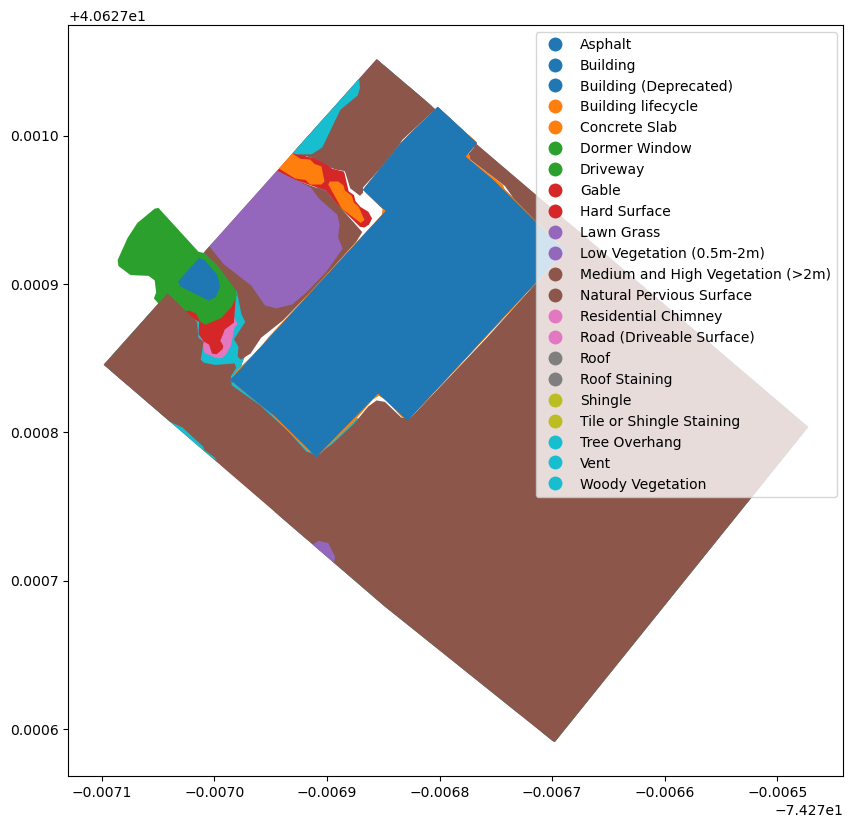

In [10]:
# Simple plot of features
filtered_features_gdf.plot("description", legend=True, figsize=(10, 10))

In [11]:
filtered_features_gdf

,feature_id,class_id,internal_class_id,description,confidence,parent_id,geometry,area_sqm,area_sqft,clipped_area_sqm,...,unclipped_area_sqft,attributes,survey_date,mesh_date,class_status,fidelity,aoi_id,intersection_ratio,building_small,building_multiparcel
0,078b74e8-fb3f-53e1-89fa-f9af43526b83,dfd8181b-80c9-4234-9d05-0eef927e3aca,1025,Medium and High Vegetation (>2m),0.961399,,"POLYGON ((-74.27689 40.62772, -74.27691 40.627...",811.3,8732.0,811.3,...,3.104100e+04,[],2024-06-20,,prod,NaN,0,2.813302e-01,NaN,NaN
1,0daa661f-3731-5d74-b4fb-9ffdc3fc350c,eaa83113-44b3-505e-9515-ba8a8d403dd4,1107,Woody Vegetation,0.985368,,"MULTIPOLYGON (((-74.27694 40.62776, -74.27695 ...",860.6,9263.0,860.6,...,1.051590e+05,[],2024-06-20,,prod,NaN,0,8.808958e-02,NaN,NaN
2,0dae2c7f-e351-5bde-ae6d-8b8372688f76,cfa8951a-4c29-54de-ae98-e5f804c305e3,1053,Tile or Shingle Staining,0.611328,91884cf7-c1cd-5aa9-b4ff-f2e4d03000f5,"POLYGON ((-74.27682 40.62795, -74.27682 40.627...",29.8,321.0,29.8,...,3.210000e+02,[],2024-06-20,,prod,NaN,0,1.000000e+00,NaN,NaN
3,16ecde76-a233-5b1c-b195-93356ecdc1b3,319f552f-f4b7-520d-9b16-c8abb394b043,1144,Roof Staining,0.623047,91884cf7-c1cd-5aa9-b4ff-f2e4d03000f5,"POLYGON ((-74.27689 40.62783, -74.27688 40.627...",7.5,81.0,7.5,...,8.100000e+01,[],2024-06-20,,prod,NaN,0,1.000000e+00,NaN,NaN
4,171e2df5-e297-53b1-9f1e-f75990e838a4,68dc5061-5842-4a17-8073-e278a91b607d,1028,Lawn Grass,0.626953,,"MULTIPOLYGON (((-74.27670 40.62795, -74.27672 ...",43.0,463.0,43.0,...,3.253000e+03,[],2024-06-20,,prod,NaN,0,1.422428e-01,NaN,NaN
5,19036eed-9ead-539a-9b6a-95a6eeaa8b7f,2780fa70-7713-437c-ad98-656b8a5cc4f2,1026,Low Vegetation (0.5m-2m),0.685547,,"POLYGON ((-74.27681 40.62802, -74.27682 40.628...",7.6,82.0,7.6,...,1.220000e+02,[],2024-06-20,,prod,NaN,0,6.666667e-01,NaN,NaN
6,22cb9286-4fb4-5958-9621-05b697afa149,372fb6c1-a3ab-5019-ba0f-489ed12079de,1034,Road (Driveable Surface),0.964431,,"POLYGON ((-74.27700 40.62791, -74.27698 40.627...",21.7,233.0,21.7,...,2.587315e+09,[],2024-06-20,,prod,NaN,0,9.027772e-08,NaN,NaN
7,363b90ac-01d7-501e-8268-145eb8a4ca36,cfa8951a-4c29-54de-ae98-e5f804c305e3,1053,Tile or Shingle Staining,0.517578,91884cf7-c1cd-5aa9-b4ff-f2e4d03000f5,"POLYGON ((-74.27686 40.62796, -74.27686 40.627...",0.1,1.0,0.1,...,1.000000e+00,[],2024-06-20,,prod,NaN,0,1.000000e+00,NaN,NaN
8,44d6745b-9432-5883-8fab-3d5858d3c6d4,eaa83113-44b3-505e-9515-ba8a8d403dd4,1107,Woody Vegetation,0.626953,,"POLYGON ((-74.27690 40.62796, -74.27690 40.627...",6.1,65.0,6.1,...,6.500000e+01,[],2024-06-20,,prod,NaN,0,1.000000e+00,NaN,NaN
9,44f0bf45-7de3-564d-999a-72e0fa520cfc,2780fa70-7713-437c-ad98-656b8a5cc4f2,1026,Low Vegetation (0.5m-2m),0.568359,,"POLYGON ((-74.27691 40.62796, -74.27690 40.627...",2.5,27.0,2.5,...,2.700000e+01,[],2024-06-20,,prod,NaN,0,1.000000e+00,NaN,NaN


# Create parcel rollup

Once we have the features in a parcel, all that remains is to flatten the features and attributes to tabular format. Note that roof and building values relate to the primary building and roof within a parcel. The primary building is defined as the building with the largest area within the parcel.

In [12]:
df_classes = pd.DataFrame([{"description": "Roof"}], index=[constants.ROOF_ID])
df_classes

,description
c08255a4-ba9f-562b-932c-ff76f2faeeeb,Roof


In [13]:
rollup = parcels.feature_attributes(
    filtered_features_gdf, df_classes, "us", "largest_intersection", primary_decision="largest_intersection"
)
rollup

{'roof_present': 'Y',
 'roof_count': 1,
 'roof_total_area_sqft': 3115.0,
 'roof_total_clipped_area_sqft': 3103.0,
 'roof_total_unclipped_area_sqft': 3115.0,
 'roof_confidence': 0.9902344,
 'primary_roof_area_sqft': 3115.0,
 'primary_roof_clipped_area_sqft': 3103.0,
 'primary_roof_unclipped_area_sqft': 3115.0,
 'primary_roof_confidence': 0.9902344,
 'primary_roof_tile_present': 'N',
 'primary_roof_tile_area_sqft': 0,
 'primary_roof_tile_confidence': None,
 'primary_roof_tile_dominant': 'N',
 'primary_roof_shingle_present': 'Y',
 'primary_roof_shingle_area_sqft': 3109,
 'primary_roof_shingle_confidence': 0.9980469,
 'primary_roof_shingle_dominant': 'Y',
 'primary_roof_metal_present': 'N',
 'primary_roof_metal_area_sqft': 0,
 'primary_roof_metal_confidence': None,
 'primary_roof_metal_dominant': 'N',
 'primary_roof_ballasted_present': 'N',
 'primary_roof_ballasted_area_sqft': 0,
 'primary_roof_ballasted_confidence': None,
 'primary_roof_ballasted_dominant': 'N',
 'primary_roof_mod-bit_pre

In [14]:
df_classes = feature_api.get_feature_classes()
df_classes

,type,internalId,description,availability,schema
id,,,,,
00b83b22-a1a5-5268-99fb-62c3c3554d1d,Feature,1043,Raised Car Park,"[{'systemVersion': 'gen5-tranquil_pool-1.0', '...",NaN
00f385f3-683b-52d4-953e-02e86f2e89c7,Feature,1067,Unmaintained Swimming Pool,"[{'systemVersion': 'gen5-tranquil_pool-1.0', '...",NaN
027835c1-443c-55aa-940f-26b474cea277,Attribute,15,Pool Condition,"[{'systemVersion': 'gen5-tranquil_pool-1.0', '...","{'type': 'object', 'properties': {'classId': {..."
0339726f-081e-5a6e-b9a9-42d95c1b5c8a,Feature,1001,Swimming Pool,"[{'systemVersion': 'gen4-building_storm-2.3', ...",NaN
042a1d14-4a23-50dc-aabb-befc9645af3b,Feature,1084,Leaf-off Tree Overhang,"[{'systemVersion': 'gen5-tranquil_pool-1.0', '...",NaN
046ba67f-ca1e-5801-bb1c-bfcafea2d796,Feature,1060,Residential Satellite Dish,"[{'systemVersion': 'gen5-tranquil_pool-1.0', '...",NaN
09b925d2-df1d-599b-89f1-3ffd39df791e,Feature,1180,Bowstring Truss,"[{'systemVersion': 'gen6-glowing_grove-1.0', '...",NaN
09ed6bf9-182a-5c79-ae59-f5531181d298,Feature,1160,Clay Tile,"[{'systemVersion': 'gen6-glowing_grove-1.0', '...",NaN
0ad1355f-5dfd-403b-8b8b-b7d8ed95731f,Feature,1029,Natural (soft),"[{'systemVersion': 'gen4-building_storm-2.3', ...",NaN


In [15]:
rollup = parcels.feature_attributes(
    filtered_features_gdf, df_classes, parcel_geom=polygon, country="us", primary_decision="largest_intersection"
)

print(f"Rollup generated from Feature Api contains {len(rollup)} columns:")
display(rollup)

Rollup generated from Feature Api contains 1492 columns:


{'raised_car_park_present': 'N',
 'raised_car_park_count': 0,
 'raised_car_park_total_area_sqft': 0.0,
 'raised_car_park_total_clipped_area_sqft': 0.0,
 'raised_car_park_total_unclipped_area_sqft': 0.0,
 'raised_car_park_confidence': None,
 'primary_raised_car_park_area_sqft': 0.0,
 'primary_raised_car_park_clipped_area_sqft': 0.0,
 'primary_raised_car_park_unclipped_area_sqft': 0.0,
 'primary_raised_car_park_confidence': None,
 'unmaintained_swimming_pool_present': 'N',
 'unmaintained_swimming_pool_count': 0,
 'unmaintained_swimming_pool_total_area_sqft': 0.0,
 'unmaintained_swimming_pool_total_clipped_area_sqft': 0.0,
 'unmaintained_swimming_pool_total_unclipped_area_sqft': 0.0,
 'unmaintained_swimming_pool_confidence': None,
 'primary_unmaintained_swimming_pool_area_sqft': 0.0,
 'primary_unmaintained_swimming_pool_clipped_area_sqft': 0.0,
 'primary_unmaintained_swimming_pool_unclipped_area_sqft': 0.0,
 'primary_unmaintained_swimming_pool_confidence': None,
 'pool_condition_present':

# Use the Rollup API

If all we want is a tabular data set (rather than working with features), the Rollup API allows us to skip the need for filtering objects, and calculating rollups on the geospatial data. Below, we hit the rollup API for the same polygon, and show the result.

In the data format, we have:

* A uuid for each column, so they can be used reliably in real-time applications if the description changes.
* A descriptive name to make it simpler to interpret what the column is (not recommended for display in customer facing applications, as this may change).
* Values for each payload, for every column.

There are a number of repeated column types:

* "clipped area" vs "unclipped area" denotes area of that feature class clipped (via intersection) to the query AOI, or unclipped (returning the full area of discrete objects that protrude beyond the query AOI boundary).
* "total" vs "primary" attributes (e.g. "total clipped area (sq. m) of building" vs "clipped area (sq. m) of primary building") denotes an aggregate of all features from that feature class (e.g. all buildings), compared to the values pertaining to just the primary feature (which is chosen as the feature with largest intersecting area with the Query AOI).
* Results are usually provided in both metric and imperial (e.g. sq. m and sq. ft).
* "Building Present" is a boolean flag indicating whether at least one building exists in the Query AOI.
* "Building presence confidence" represents the probability that at least one building exists in the Query AOI.
* "Building Count" is the number of unique buildings in the Query AOI.

In [16]:
# Get the API payload for that polygon as a geodataframe
rollup_df, metadata_df, error_df = feature_api.get_rollup_df(polygon, region="us")
assert error_df is None

In [17]:
metadata_df

{'system_version': 'gen6-glowing_grove-1.0', 'link': '', 'date': '2024-06-20'}

In [18]:
print(f"The rollup payload has {len(rollup_df.columns)} columns")

The rollup payload has 1290 columns


In [19]:
display(rollup_df.T)

,,0
b02a3652-8a87-5d20-849c-1afb3df67b19,survey (capture) date,2024-06-20
3811c6c8-b61e-5c3d-9d14-5e0dcacb4708,system version,gen6-glowing_grove-1.0
bf2b15d0-dbfc-55f3-bcdc-b571028942ec,perspective,Vert
16e9daa8-5c30-5eda-9443-1e6c2ce53267,building (deprecated) present,True
75125c73-342a-5a02-973d-7e18fe58bfc8,building (deprecated) count,1
...,...,...
01c1cf64-7ced-506c-a01f-f43f5cbafa2a,trampoline presence confidence,NaN
31c62a64-f5b3-584a-aed3-123a69cf9413,total clipped area (sq. m) of trampoline,0
cbfab4f4-db9c-5d63-bc5b-0cb09d49a53e,total clipped area (sq. ft) of trampoline,0
556f7f6b-4d34-5640-bdfc-f4041fb23d90,total unclipped area (sq. m) of trampoline,0
